In [24]:
# %load diffsolver.py
import numpy as np
import matplotlib.pyplot as plot


class OdeTime:
    
    def __init__(self, t_from, t_to, t_intervals):
        self.t_from = t_from
        self.t_to = t_to
        self.t_intervals = t_intervals
        self.dt = (t_to - t_from) / float(t_intervals)

    def time(self, i):
        return self.t_from + self.dt * float(i)


class OdeInput:
    
    #input
    #    time: odeTime
    #    initialValues: numpy matrix of dimension 1*n
    
    def __init__(self, time, initial_values):
        self.time = time
        self.initial_values = initial_values
    
    def length(self):
        return self.time.t_intervals+1
    
    def dimension(self):
        return self.initial_values.shape[0]


class OdeOutput:
    
    def __init__(self, ode_input):
        self.ode_input = ode_input
        self.results = np.zeros((ode_input.length(), ode_input.dimension()))
        self.times = np.zeros((ode_input.length(), 1))
    
    def length(self):
        return self.ode_input.length()
    
    def dimension(self):
        return self.ode_input.dimension()
    

class OdeSolver:
    
    def __init__(self, time_info, initial_values):
        ode_input = OdeInput(time_info, initial_values)
        self.ode_input = ode_input
        self.ode_output = OdeOutput(ode_input)
        
    def equation(self, t, x):
        return x
    
    def solve(self):
        dt = self.ode_input.time.dt

        # new value is set to the initial data at first
        new_value = self.ode_input.initial_values
        
        # save initial data to output
        self.ode_output.results[0] = new_value
        self.ode_output.times[0] = self.ode_input.time.time(0)
        
        for i in range(1, self.ode_input.length()):
            # move new values to old values
            old_value = new_value
            
            time_old = self.ode_input.time.time(i - 1)
            
            k1 = self.equation(time_old, old_value)
            k2 = self.equation(time_old + 0.5 * dt, 0.5 * dt * k1 + old_value)
            k3 = self.equation(time_old + 0.5 * dt, 0.5 * dt * k2 + old_value)
            k4 = self.equation(time_old + 1.0 * dt, 1.0 * dt * k3 + old_value)
            
            new_value = old_value + (dt / 6.0) * (1.0 * k1 + 2.0 * k2 + 2.0 * k3 + 1.0 * k4)
            
            self.ode_output.results[i] = new_value
            self.ode_output.times[i] = self.ode_input.time.time(i)
            
    def print_result(self):
        print("Solved ODE")
        print("Initial value: ", self.ode_input.initial_values)
        print("Output:")
        for i in range(0, self.ode_output.length()):
            t = self.ode_input.time.time(i)
            print("t: ", t, "y: ", self.ode_output.results[i])

    def print_graph(self):
        x = self.ode_output.times
        for i in range(0, self.ode_output.dimension()):
            plot.plot(x, self.ode_output.results[:, i])
        plot.show()

In [25]:
time_info = OdeTime(0.0, 1.0, 100)
initial_value = np.array([1.0])
solver = OdeSolver(time_info, initial_value)

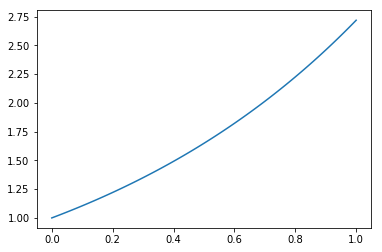

In [26]:
solver.solve()
solver.print_graph()

In [44]:
class PredatorPrey(OdeSolver):
    
    def __init__(self, time_info, initial_values):
        OdeSolver.__init__(self, time_info, initial_values)
    
    def equation(self, t, x):
        x1 = 1.5 * x[0] - 0.5 * x[0] * x[1]
        x2 = -0.5 * x[1] + 1.0 * x[0] * x[1]
        return np.array([x1, x2])

In [49]:
time_info2 = OdeTime(0.0, 100.0, 10000)
initial_value2 = np.array([15.0, 20.0])
solver = PredatorPrey(time_info2, initial_value2)

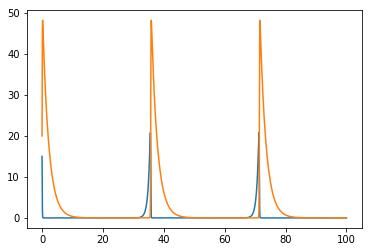

In [50]:
solver.solve()
solver.print_graph()